In [3]:
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [4]:
dataset = pd.read_csv('LinearRegressionData.csv')

In [6]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [10]:
X = dataset.iloc[:, :-1].values # 처음부터 마지막 column 직전까지의 데이터(독립 변수)
y = dataset.iloc[:, -1].values # 마지막 column 데이터(종속 변수 - 결과)

In [11]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)# 학습(모델 생성)

LinearRegression()

In [14]:
y_pred = reg.predict(X)# X에 대한 예측값
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

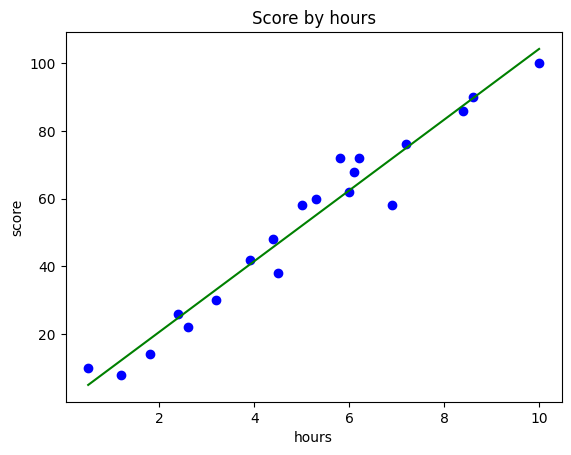

In [15]:
plt.scatter(X,y, color = 'blue')# 산점도
plt.plot(X, y_pred, color='green')# 선 그래프
plt.title('Score by hours')# 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [16]:
print("9시간 공부했을 때 예상 점수 : ",reg.predict([[9]]))

9시간 공부했을 때 예상 점수 :  [93.77478776]


In [17]:
reg.coef_ #기울기

array([10.44369694])

In [18]:
reg.intercept_ # y 절편

np.float64(-0.218484702867201)

### 데이터 세트 분리

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=0)# test set 사이즈를 0.2로

In [24]:
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [25]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [26]:
X_test

array([[ 8.6],
       [ 1.2],
       [10. ],
       [ 4.5]])

### 분리된 데이터를 통한 모델링

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [28]:
reg.fit(X_train, y_train)# 훈련 세트로 학습

LinearRegression()

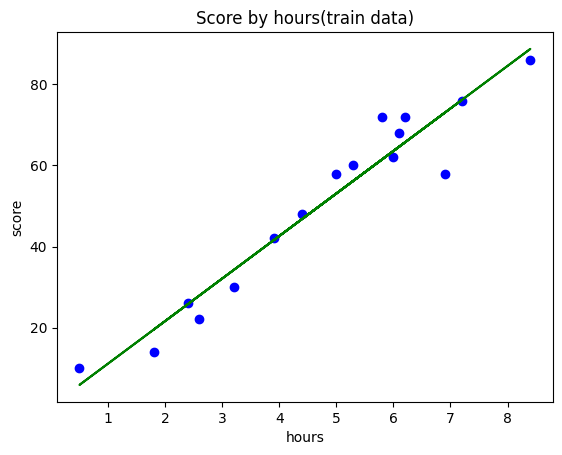

In [30]:
plt.scatter(X_train,y_train, color = 'blue')# 산점도
plt.plot(X_train, reg.predict(X_train), color='green')# 선 그래프
plt.title('Score by hours(train data)')# 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화(테스트 세트)

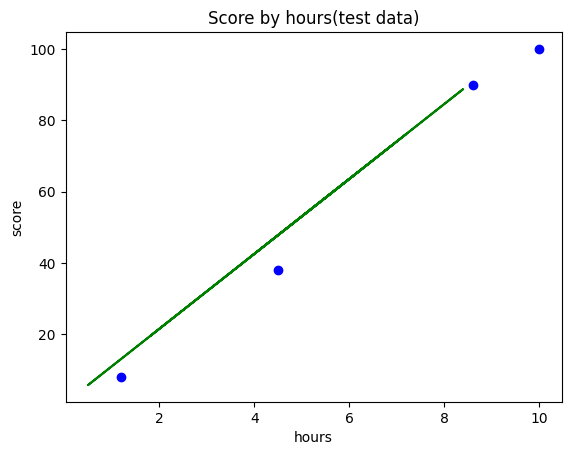

In [31]:
plt.scatter(X_test,y_test, color = 'blue')# 산점도
plt.plot(X_train, reg.predict(X_train), color='green')# 선 그래프
plt.title('Score by hours(test data)')# 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 모델 평가

In [32]:
reg.score(X_test, y_test)# 테스트 세트를 통한 모델 평가

0.9727616474310156

In [33]:
reg.score(X_train, y_train)# 훈련 세트를 통한 모델 평가

0.9356663661221668

### 경사 하강법(Gradient Descent)

max_iter : 훈련 세트 반복 횟수(에포크 횟수)

eta0 : 학습률(learning rate)

In [64]:
from sklearn.linear_model import SGDRegressor # SGD : Stochastic Gradient Descent
sr = SGDRegressor(max_iter=200, eta0=1e-3, random_state=0)
sr.fit(X_train,y_train)

SGDRegressor(eta0=0.001, max_iter=200, random_state=0)

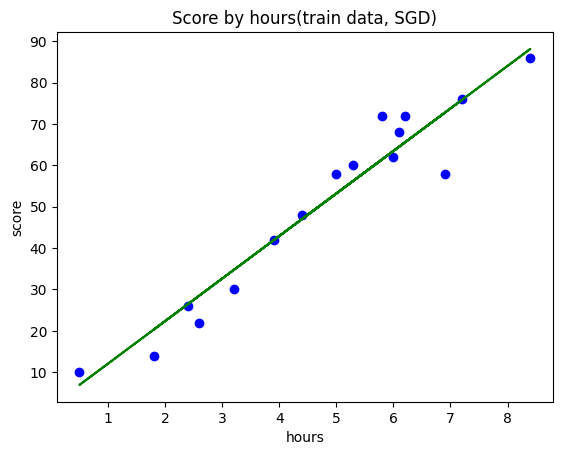

In [65]:
plt.scatter(X_train,y_train, color = 'blue')# 산점도
plt.plot(X_train, sr.predict(X_train), color='green')# 선 그래프
plt.title('Score by hours(train data, SGD)')# 제목
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [40]:
sr.coef_,sr.intercept_

(array([10.22299043]), array([1.69204364]))

In [66]:
sr.score(X_test,y_test)

0.9719916063560563

In [67]:
sr.score(X_train,y_train)

0.9352292295423332

In [ ]:
#다중공산성